In [1]:
# importing packages
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [2]:
# reading in CSV
df = pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
88352,62102.0,-3.558416,3.361879,-0.825738,0.063139,-1.483213,0.022388,-2.899720,-3.800801,-0.482071,...,-2.719633,0.102067,0.699129,0.273414,-0.177875,0.063528,0.112856,0.213258,1.29,0
110090,71675.0,-0.953912,0.544639,1.864223,-0.656179,-0.443491,0.333189,1.299005,-0.189385,0.115951,...,-0.342186,-0.751602,-0.083793,0.004180,-0.115169,-0.008980,-0.297993,-0.201565,149.00,0
55317,46879.0,0.892421,-2.063525,0.576303,-0.985327,-2.330520,-0.917728,-0.857572,-0.221481,-1.590160,...,0.153586,0.146474,-0.235549,0.708354,0.194663,-0.133738,-0.009849,0.081166,315.00,0
49141,43929.0,-1.954049,0.339582,0.941772,-0.443173,1.972136,-0.012721,0.845263,-0.722560,0.488462,...,-0.255606,-0.057619,-1.199104,-1.257245,0.687068,-0.461534,-0.908247,-0.616998,73.30,0
191687,129370.0,1.906589,-0.195966,-0.601248,1.254521,0.176360,0.735395,-0.358480,0.220851,0.833487,...,-0.489145,-1.163592,0.395365,0.153322,-0.265202,-1.128716,0.051104,-0.035365,17.39,0


In [3]:
# Check the types of response for the response variable (in this case, it's just 0 and 1)

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df_zero = df[df['Class'] == 0]
df_one = df[df['Class'] == 1]

In [6]:
df_zero.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df_one.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [8]:
# Shuffle dataframe for response=0 and =1 so that train-test will not be biased in case rows that are similar are placed side by side
# Later on, we will reset the index and select by the index number by sections
from sklearn.utils import shuffle
df_zero = shuffle(df_zero)
df_one = shuffle(df_one)

In [9]:
df_zero.head(10)
# Notice indexes are scrambled now, meaning the DF is shuffled
# Now we need to reset indexes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38749,39532.0,0.971113,-1.659562,0.722431,-1.899470,-1.549067,0.594218,-1.130989,0.363611,0.866955,...,-0.363476,-0.490157,0.014178,-0.274979,0.074104,-0.071981,0.079754,0.034644,141.03,0
14106,25098.0,-0.336131,0.657946,2.977536,2.681183,-0.031984,1.225932,-0.277693,0.210910,1.131376,...,-0.141406,0.299832,-0.139253,-0.039415,-0.627553,-0.042968,0.032014,-0.056788,1.52,0
9303,13475.0,1.062798,-0.007554,1.169893,1.694109,-0.559090,0.527767,-0.608457,0.254902,1.958445,...,-0.175983,0.050427,-0.040761,0.185224,0.516446,-0.325208,0.039374,0.007193,9.00,0
208161,136997.0,2.016285,0.222945,-1.958224,1.038292,0.795849,-0.712058,0.587847,-0.212322,-0.266948,...,0.165750,0.461835,0.027886,0.674407,0.405858,-0.531537,-0.045563,-0.068150,9.90,0
71140,54176.0,-1.604393,-0.733035,1.462215,0.453458,-1.116662,0.434096,0.356230,-0.071686,-0.715002,...,-0.447104,0.184563,0.398307,0.155327,-0.092147,-0.217345,0.356187,-0.140547,214.00,0
3993,3636.0,-0.499278,1.113689,1.891815,0.250027,-0.095030,-0.667091,0.582216,-0.048468,0.838394,...,-0.311047,-0.564750,0.102482,0.526521,-0.356401,0.028895,0.253458,0.117131,10.99,0
85461,60782.0,-1.597739,-0.236114,0.420087,-1.863046,-0.382090,-0.577880,1.356852,-0.495667,-1.616191,...,0.206889,0.642197,-0.413451,0.050175,0.513756,-0.281725,-0.486751,0.408748,220.17,0
265933,162111.0,2.064689,0.176199,-1.687264,0.412250,0.467445,-0.801310,0.195944,-0.232690,0.436341,...,-0.353030,-0.887210,0.345110,0.518407,-0.264161,0.174105,-0.057145,-0.029994,1.79,0
229034,145773.0,-3.418657,-3.228166,0.812075,-0.096455,5.208599,-0.797125,-1.676965,0.768249,0.230629,...,0.157488,-0.320729,0.366561,-1.911710,0.545597,0.156143,-0.225550,-0.097825,30.58,0
79467,58036.0,1.252088,-0.246472,0.034462,-0.902255,-0.612086,-0.992264,-0.110771,-0.049973,1.391550,...,-0.011745,0.021597,-0.033295,0.041311,0.548375,-0.651578,0.048756,0.015557,8.00,0


In [10]:
df_one.head(10)
# Notice indexes are scrambled now, meaning the DF is shuffled
# Now we need to reset indexes

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68633,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1
83297,59777.0,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,319.20,1
42784,41243.0,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,...,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,45.49,1
17453,28726.0,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1
63421,50706.0,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1
152223,97121.0,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,...,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,8.64,1
12261,21419.0,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
53794,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1
149600,91554.0,-5.100256,3.633442,-3.843919,0.183208,-1.183997,1.602139,-3.005953,-8.645038,1.285458,...,8.280439,-2.797150,1.090707,-0.159260,0.532156,-0.497126,0.943622,0.553581,261.22,1


In [11]:
df_zero = df_zero.reset_index(drop=True)
df_one = df_one.reset_index(drop=True)

In [12]:
df_zero.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,39532.0,0.971113,-1.659562,0.722431,-1.899470,-1.549067,0.594218,-1.130989,0.363611,0.866955,...,-0.363476,-0.490157,0.014178,-0.274979,0.074104,-0.071981,0.079754,0.034644,141.03,0
1,25098.0,-0.336131,0.657946,2.977536,2.681183,-0.031984,1.225932,-0.277693,0.210910,1.131376,...,-0.141406,0.299832,-0.139253,-0.039415,-0.627553,-0.042968,0.032014,-0.056788,1.52,0
2,13475.0,1.062798,-0.007554,1.169893,1.694109,-0.559090,0.527767,-0.608457,0.254902,1.958445,...,-0.175983,0.050427,-0.040761,0.185224,0.516446,-0.325208,0.039374,0.007193,9.00,0
3,136997.0,2.016285,0.222945,-1.958224,1.038292,0.795849,-0.712058,0.587847,-0.212322,-0.266948,...,0.165750,0.461835,0.027886,0.674407,0.405858,-0.531537,-0.045563,-0.068150,9.90,0
4,54176.0,-1.604393,-0.733035,1.462215,0.453458,-1.116662,0.434096,0.356230,-0.071686,-0.715002,...,-0.447104,0.184563,0.398307,0.155327,-0.092147,-0.217345,0.356187,-0.140547,214.00,0
5,3636.0,-0.499278,1.113689,1.891815,0.250027,-0.095030,-0.667091,0.582216,-0.048468,0.838394,...,-0.311047,-0.564750,0.102482,0.526521,-0.356401,0.028895,0.253458,0.117131,10.99,0
6,60782.0,-1.597739,-0.236114,0.420087,-1.863046,-0.382090,-0.577880,1.356852,-0.495667,-1.616191,...,0.206889,0.642197,-0.413451,0.050175,0.513756,-0.281725,-0.486751,0.408748,220.17,0
7,162111.0,2.064689,0.176199,-1.687264,0.412250,0.467445,-0.801310,0.195944,-0.232690,0.436341,...,-0.353030,-0.887210,0.345110,0.518407,-0.264161,0.174105,-0.057145,-0.029994,1.79,0
8,145773.0,-3.418657,-3.228166,0.812075,-0.096455,5.208599,-0.797125,-1.676965,0.768249,0.230629,...,0.157488,-0.320729,0.366561,-1.911710,0.545597,0.156143,-0.225550,-0.097825,30.58,0
9,58036.0,1.252088,-0.246472,0.034462,-0.902255,-0.612086,-0.992264,-0.110771,-0.049973,1.391550,...,-0.011745,0.021597,-0.033295,0.041311,0.548375,-0.651578,0.048756,0.015557,8.00,0


In [13]:
df_one.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1
1,59777.0,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,319.20,1
2,41243.0,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,...,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,45.49,1
3,28726.0,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1
4,50706.0,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1
5,97121.0,-17.976266,12.864989,-19.575066,11.345120,-13.998646,-0.354900,-23.783470,-4.872353,-8.504285,...,-4.300432,2.865772,1.489302,0.386039,-0.232392,0.413827,-3.255981,-0.538963,8.64,1
6,21419.0,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00,1
7,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
8,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00,1
9,91554.0,-5.100256,3.633442,-3.843919,0.183208,-1.183997,1.602139,-3.005953,-8.645038,1.285458,...,8.280439,-2.797150,1.090707,-0.159260,0.532156,-0.497126,0.943622,0.553581,261.22,1


In [14]:
# Get number of rows
df_one.shape[0]

492

In [16]:
# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/5))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
    

98
Getting DF from index 0 to 98
Getting DF from index 98 to 196
Getting DF from index 196 to 294
Getting DF from index 294 to 392
Getting DF from index 392 to 492


In [17]:
df_one.iloc[0:]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1
1,59777.0,-8.257111,-4.814461,-5.365307,1.204230,-3.347420,-1.331601,-1.967893,1.295438,-1.674415,...,0.436390,-0.077553,-3.091624,-0.390201,-0.288689,-0.340004,0.039819,-1.007900,319.20,1
2,41243.0,-10.940739,6.261586,-14.182339,7.183602,-9.951363,-3.860820,-13.547302,7.096472,-6.294029,...,2.267448,-0.492029,-0.239303,0.454368,-0.101611,0.446997,0.062293,-0.439770,45.49,1
3,28726.0,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1
4,50706.0,-8.461845,6.866198,-11.838269,4.194211,-6.923097,-3.221147,-7.553497,6.015618,-2.466143,...,0.918244,-0.715366,0.210747,-0.060211,0.509535,-0.257284,1.170027,0.229301,99.99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,35585.0,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,-0.003159,...,2.839596,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,0.76,1
488,56806.0,0.016828,2.400826,-4.220360,3.462217,-0.624142,-1.294303,-2.986028,0.751883,-1.606672,...,0.285832,-0.771508,-0.265200,-0.873077,0.939776,-0.219085,0.874494,0.470434,1.00,1
489,100924.0,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,-21.560039,-10.842526,...,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1.00,1
490,26863.0,-21.209120,12.652197,-23.553933,6.174078,-16.026658,-4.422195,-16.229444,14.116002,-3.922741,...,1.758440,-1.522588,-0.903860,0.130166,1.454857,-0.223214,1.550928,0.461460,99.99,1


In [18]:
df_one.iloc[491]

Time      49985.000000
V1           -1.554216
V2            1.694229
V3           -0.903334
V4            2.425436
V5           -2.899787
V6            0.133028
V7           -0.286226
V8            0.555945
V9           -1.394918
V10          -2.892612
V11           1.962236
V12          -2.385263
V13           0.458337
V14          -3.724543
V15           1.843978
V16          -2.013924
V17          -2.815600
V18          -1.092290
V19           0.139687
V20          -0.032334
V21           0.493436
V22           0.733393
V23           0.202350
V24           0.492054
V25          -0.183791
V26          -0.199917
V27           0.395201
V28           0.027693
Amount      360.000000
Class         1.000000
Name: 491, dtype: float64

In [19]:
# Index goes from 0 to 491, so .iloc[0:492] will work fine as it includes 491 and excludes 492
df_one.iloc[492]

IndexError: single positional indexer is out-of-bounds

In [20]:
# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:end_index])
    

98
Getting DF from index 0 to 98
        Time         V1         V2         V3        V4         V5        V6  \
0    53076.0   1.296231   0.417447   0.193963  0.901644   0.130531 -0.371634   
1    59777.0  -8.257111  -4.814461  -5.365307  1.204230  -3.347420 -1.331601   
2    41243.0 -10.940739   6.261586 -14.182339  7.183602  -9.951363 -3.860820   
3    28726.0 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
4    50706.0  -8.461845   6.866198 -11.838269  4.194211  -6.923097 -3.221147   
..       ...        ...        ...        ...       ...        ...       ...   
93   94362.0 -26.457745  16.497472 -30.177317  8.904157 -17.892600 -1.227904   
94   41138.0  -4.595617   5.083690  -7.581015  7.546033  -6.949165 -1.729185   
95   68207.0 -13.192671  12.785971  -9.906650  3.320337  -4.801176  5.760059   
96  102489.0  -2.296987   4.064043  -5.957706  4.680008  -2.080938 -1.463272   
97  148053.0   1.261324   2.726800  -5.435019  5.342759   1.447043 -1.442584   

      

         Time         V1         V2         V3        V4         V5        V6  \
392  154599.0   0.667714   3.041502  -5.845112  5.967587   0.213863 -1.462923   
393   51112.0  -9.848776   7.365546 -12.898538  4.273323  -7.611991 -3.427045   
394   65385.0  -2.923827   1.524837  -3.018758  3.289291  -5.755542  2.218276   
395  103808.0  -4.517344   2.500224  -4.013928  1.189452  -2.486861 -1.413476   
396  142840.0  -3.613850  -0.922136  -4.749887  3.373001  -0.545207 -1.171301   
..        ...        ...        ...        ...       ...        ...       ...   
485   26585.0 -19.856322  12.095893 -22.464083  6.115541 -15.148022 -4.346724   
486  129308.0   0.054682   1.856500  -4.075451  4.100098  -0.800931 -0.292502   
487   35585.0  -2.019001   1.491270   0.005222  0.817253   0.973252 -0.639268   
488   56806.0   0.016828   2.400826  -4.220360  3.462217  -0.624142 -1.294303   
489  100924.0 -23.984747  16.697832 -22.209875  9.584969 -16.230439  2.596333   

            V7         V8  

In [21]:
# Cross validation number of splits
n = 6

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:end_index])
    

82
Getting DF from index 0 to 82
        Time         V1         V2         V3        V4         V5        V6  \
0    53076.0   1.296231   0.417447   0.193963  0.901644   0.130531 -0.371634   
1    59777.0  -8.257111  -4.814461  -5.365307  1.204230  -3.347420 -1.331601   
2    41243.0 -10.940739   6.261586 -14.182339  7.183602  -9.951363 -3.860820   
3    28726.0 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
4    50706.0  -8.461845   6.866198 -11.838269  4.194211  -6.923097 -3.221147   
..       ...        ...        ...        ...       ...        ...       ...   
77  169347.0   1.378559   1.289381  -5.004247  1.411850   0.442581 -1.326536   
78   93860.0 -10.632375   7.251936 -17.681072  8.204144 -10.166591 -4.510344   
79  101051.0  -1.465316  -1.093377  -0.059768  1.064785  11.095089 -5.430971   
80   27187.0 -24.590245  14.044567 -26.278701  6.320089 -18.224513 -4.609968   
81   86376.0  -0.670238   0.945206   0.610051  2.640065  -2.707775  1.952611   

      

        Time         V1         V2         V3        V4         V5        V6  \
246  47923.0   0.364377   1.443523  -2.220907  2.036985  -1.237055 -1.728161   
247  91524.0   1.954852   1.630056  -4.337200  2.378367   2.113348 -1.583851   
248  26833.0 -20.532751  12.373989 -23.009003  6.144821 -15.587296 -4.384491   
249  70828.0   0.196707   1.189757   0.704882  2.891388   0.045555  1.245730   
250  88672.0  -3.859881   2.632881  -5.264265  3.446113  -0.675231 -1.904959   
..       ...        ...        ...        ...       ...        ...       ...   
323  51155.0 -11.205461   7.914633 -13.987752  4.333341  -8.484970 -3.506561   
324  77154.0  -0.715414   0.608590   1.155501 -0.267565  -0.563748 -0.618898   
325  41273.0 -11.682215   6.332882 -13.297109  7.690772 -10.889891 -2.792360   
326   8169.0   0.857321   4.093912  -7.423894  7.380245   0.973366 -2.730762   
327  17230.0  -0.469327   1.111453   2.041003  1.731595   0.135147 -0.093625   

            V7         V8        V9  ..

In [22]:
# Besides getting the DF for the current section, we need to concat the two DFs (before start index and after end index) not in that section

# Cross validation number of splits
n = 5

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        print('\n')
        print('Getting TRAIN DF from index 0 to ' + str(start_index) + ' and from index ' + str(end_index) + ' to ' + str(df_one.shape[0]))
        print(pd.concat([df_one.iloc[0:start_index],df_one.iloc[end_index:]], axis=0))
        print('\n')
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:df_one.shape[0]])
        print('Getting TRAIN DF from index 0 to ' + str(start_index))
        print(df_one.iloc[0:start_index])
    

98
Getting TEST DF from index 0 to 98
        Time         V1         V2         V3        V4         V5        V6  \
0    53076.0   1.296231   0.417447   0.193963  0.901644   0.130531 -0.371634   
1    59777.0  -8.257111  -4.814461  -5.365307  1.204230  -3.347420 -1.331601   
2    41243.0 -10.940739   6.261586 -14.182339  7.183602  -9.951363 -3.860820   
3    28726.0 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
4    50706.0  -8.461845   6.866198 -11.838269  4.194211  -6.923097 -3.221147   
..       ...        ...        ...        ...       ...        ...       ...   
93   94362.0 -26.457745  16.497472 -30.177317  8.904157 -17.892600 -1.227904   
94   41138.0  -4.595617   5.083690  -7.581015  7.546033  -6.949165 -1.729185   
95   68207.0 -13.192671  12.785971  -9.906650  3.320337  -4.801176  5.760059   
96  102489.0  -2.296987   4.064043  -5.957706  4.680008  -2.080938 -1.463272   
97  148053.0   1.261324   2.726800  -5.435019  5.342759   1.447043 -1.442584   

 

         Time         V1         V2         V3         V4         V5  \
196   20011.0 -14.724627   7.875157 -21.872317  11.906170  -8.348734   
197  138942.0  -2.356348   1.746360  -6.374624   1.772205  -3.439294   
198    7543.0   0.329594   3.712889  -5.775935   6.078266   1.667359   
199   41204.0  -8.440284   6.147653 -11.683706   6.702780  -8.155839   
200  147501.0  -1.611877  -0.408410  -3.829762   6.249462  -3.360922   
..        ...        ...        ...        ...        ...        ...   
289   14073.0  -4.153014   8.204797 -15.031714  10.330100  -3.994426   
290   94362.0 -26.457745  16.497472 -30.177317   8.904157 -17.892600   
291   29753.0   0.269614   3.549755  -5.810353   5.809370   1.538808   
292  156685.0  -0.129778   0.141547  -0.894702  -0.457662   0.810608   
293  150494.0   1.852889   1.069593  -1.776101   4.617410   0.770413   

           V6         V7         V8        V9  ...       V21       V22  \
196 -2.262846 -15.833443   0.077874 -6.356833  ... -2.362345 

         Time         V1         V2         V3        V4         V5        V6  \
392  154599.0   0.667714   3.041502  -5.845112  5.967587   0.213863 -1.462923   
393   51112.0  -9.848776   7.365546 -12.898538  4.273323  -7.611991 -3.427045   
394   65385.0  -2.923827   1.524837  -3.018758  3.289291  -5.755542  2.218276   
395  103808.0  -4.517344   2.500224  -4.013928  1.189452  -2.486861 -1.413476   
396  142840.0  -3.613850  -0.922136  -4.749887  3.373001  -0.545207 -1.171301   
..        ...        ...        ...        ...       ...        ...       ...   
487   35585.0  -2.019001   1.491270   0.005222  0.817253   0.973252 -0.639268   
488   56806.0   0.016828   2.400826  -4.220360  3.462217  -0.624142 -1.294303   
489  100924.0 -23.984747  16.697832 -22.209875  9.584969 -16.230439  2.596333   
490   26863.0 -21.209120  12.652197 -23.553933  6.174078 -16.026658 -4.422195   
491   49985.0  -1.554216   1.694229  -0.903334  2.425436  -2.899787  0.133028   

            V7         V8  

In [23]:
# Try splitting by 7

# Cross validation number of splits
n = 7

# Number of records per split
print(math.floor(df_one.shape[0]/n))

start_index = 0
end_index = math.floor(df_one.shape[0]/n)
for i in range(1,n+1):
    if i != n:
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(end_index))
        print(df_one.iloc[start_index:end_index])
        print('\n')
        print('Getting TRAIN DF from index 0 to ' + str(start_index) + ' and from index ' + str(end_index) + ' to ' + str(df_one.shape[0]))
        print(pd.concat([df_one.iloc[0:start_index],df_one.iloc[end_index:]], axis=0))
        print('\n')
        start_index += math.floor(df_one.shape[0]/n)
        end_index += math.floor(df_one.shape[0]/n)
    else:
        # Last section of split needs to reach the end of dataset
        print('Getting TEST DF from index ' + str(start_index) + ' to ' + str(df_one.shape[0]))
        print(df_one.iloc[start_index:df_one.shape[0]])
        print('Getting TRAIN DF from index 0 to ' + str(start_index))
        print(df_one.iloc[0:start_index])
    

70
Getting TEST DF from index 0 to 70
        Time         V1         V2         V3        V4         V5        V6  \
0    53076.0   1.296231   0.417447   0.193963  0.901644   0.130531 -0.371634   
1    59777.0  -8.257111  -4.814461  -5.365307  1.204230  -3.347420 -1.331601   
2    41243.0 -10.940739   6.261586 -14.182339  7.183602  -9.951363 -3.860820   
3    28726.0 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
4    50706.0  -8.461845   6.866198 -11.838269  4.194211  -6.923097 -3.221147   
..       ...        ...        ...        ...       ...        ...       ...   
65   40892.0  -2.140511   4.104871  -8.996859  4.028391  -5.131359 -4.153568   
66  163181.0  -5.238808   0.623013  -5.784507  1.678889  -0.364432 -0.477295   
67   41227.0  -9.001351   6.613284 -12.423635  7.519929 -10.266255 -2.113208   
68   11092.0   0.378275   3.914797  -5.726872  6.094141   1.698875 -2.807314   
69  155554.0  -1.040067   3.106703  -5.409027  3.109903  -0.887237 -2.497522   

 

         Time         V1         V2         V3        V4         V5        V6  \
0     53076.0   1.296231   0.417447   0.193963  0.901644   0.130531 -0.371634   
1     59777.0  -8.257111  -4.814461  -5.365307  1.204230  -3.347420 -1.331601   
2     41243.0 -10.940739   6.261586 -14.182339  7.183602  -9.951363 -3.860820   
3     28726.0 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
4     50706.0  -8.461845   6.866198 -11.838269  4.194211  -6.923097 -3.221147   
..        ...        ...        ...        ...       ...        ...       ...   
487   35585.0  -2.019001   1.491270   0.005222  0.817253   0.973252 -0.639268   
488   56806.0   0.016828   2.400826  -4.220360  3.462217  -0.624142 -1.294303   
489  100924.0 -23.984747  16.697832 -22.209875  9.584969 -16.230439  2.596333   
490   26863.0 -21.209120  12.652197 -23.553933  6.174078 -16.026658 -4.422195   
491   49985.0  -1.554216   1.694229  -0.903334  2.425436  -2.899787  0.133028   

            V7         V8  

         Time        V1        V2         V3         V4        V5        V6  \
210   62467.0 -5.344665 -0.285760  -3.835616   5.337048 -7.609909  3.874668   
211  128803.0 -2.272473  2.935226  -4.871394   2.419012 -1.513022 -0.480625   
212   54846.0 -2.986466 -0.000891   0.605887   0.338338  0.685448 -1.581954   
213   17520.0 -5.268053  9.067613 -15.960728  10.296603 -4.708241 -3.395375   
214  129186.0  0.290155  0.049243  -0.740524   2.865463  1.395294 -0.535163   
..        ...       ...       ...        ...        ...       ...       ...   
275    8415.0 -0.251471  4.313523  -6.891438   6.796797  0.616297 -2.966327   
276  142409.0 -1.172183  1.661713  -3.049637   2.555058  3.669035 -3.162998   
277   87883.0 -1.360293 -0.458069  -0.700404   2.737229 -1.005106  2.891399   
278   65728.0  1.227614 -0.668974  -0.271785  -0.589440 -0.604795 -0.350285   
279  118603.0 -6.677212  5.529299  -7.193275   6.081321 -1.636071  0.500610   

            V7        V8        V9  ...       V21  

         Time         V1         V2         V3        V4         V5        V6  \
0     53076.0   1.296231   0.417447   0.193963  0.901644   0.130531 -0.371634   
1     59777.0  -8.257111  -4.814461  -5.365307  1.204230  -3.347420 -1.331601   
2     41243.0 -10.940739   6.261586 -14.182339  7.183602  -9.951363 -3.860820   
3     28726.0 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
4     50706.0  -8.461845   6.866198 -11.838269  4.194211  -6.923097 -3.221147   
..        ...        ...        ...        ...       ...        ...       ...   
487   35585.0  -2.019001   1.491270   0.005222  0.817253   0.973252 -0.639268   
488   56806.0   0.016828   2.400826  -4.220360  3.462217  -0.624142 -1.294303   
489  100924.0 -23.984747  16.697832 -22.209875  9.584969 -16.230439  2.596333   
490   26863.0 -21.209120  12.652197 -23.553933  6.174078 -16.026658 -4.422195   
491   49985.0  -1.554216   1.694229  -0.903334  2.425436  -2.899787  0.133028   

            V7         V8  

         Time         V1         V2         V3        V4         V5        V6  \
0     53076.0   1.296231   0.417447   0.193963  0.901644   0.130531 -0.371634   
1     59777.0  -8.257111  -4.814461  -5.365307  1.204230  -3.347420 -1.331601   
2     41243.0 -10.940739   6.261586 -14.182339  7.183602  -9.951363 -3.860820   
3     28726.0 -29.876366  16.434525 -30.558697  6.505862 -21.665654 -4.940356   
4     50706.0  -8.461845   6.866198 -11.838269  4.194211  -6.923097 -3.221147   
..        ...        ...        ...        ...       ...        ...       ...   
415   72824.0  -1.111495  -0.257575   2.250210  1.152671   0.432904  1.254126   
416   12093.0  -4.696795   2.693867  -4.475133  5.467685  -1.556758 -1.549420   
417   75033.0  -0.430330   0.985633   0.645789  0.317131   0.616332 -1.347462   
418  154181.0  -0.549615   2.219075  -3.522024  0.236995   1.087469 -1.235530   
419   85864.0  -3.365265   2.928541  -5.660999  3.891160  -1.840375 -1.800887   

            V7         V8  

# New model pipeline with cross validation (set n_fold)

### varlist argument for run_model 
### Specify the dataframe df
### varlist which is list of variables (needs to have response inside)
### response is response name in string
### standardize is whether to standardize variables (can change list of vars to standardize)
### sampletype is type of sampling to do
### modelname is type of model to use
### text is text to put for modelling
### n_fold is number of folds

In [27]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb 
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

class modelpipeline:
    def __init__(self):
        pass
    
    def run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold):
        # Remove any features not wanted based on varlist input
        df = df[varlist]
        # We have to remove response from varlist as it is used later to subset out features
        # Refer to the for loop for the cross validation where X_train and X_test is created at the end of loop
        varlist.remove(response)
            
        if isinstance(n_fold, int) and n_fold > 1:
            # Initialize dictionary to store results
            self.store = {"accuracy": [], "actual_accuracy": [], "sensitivity": [], "specificity": [], 
                          "precision": [], "f1": [], "auc": [], "final": {}}
            
            # Split dataframes into 2, one for positive response and one for negative
            df_zero = df[df[response] == 0]
            df_one = df[df[response] == 1]
            
            # Shuffle dataframe for response=0 and =1 so that train-test will not be biased in case rows that are similar are placed side by side
            # Later on, we will reset the index and select by the index number by sections
            df_zero = shuffle(df_zero, random_state=42)
            df_one = shuffle(df_one, random_state=42)
            df_zero = df_zero.reset_index(drop=True)
            df_one = df_one.reset_index(drop=True)
        
            # Get the average number of records required for negative response and positive response for test records
            # Train records will then have all the other records not in the test records
            # n_fold is the number of folds for cross validation
            start_index_one = 0
            end_index_one = math.floor(df_one.shape[0]/n_fold)
            start_index_zero = 0
            end_index_zero = math.floor(df_zero.shape[0]/n_fold)
            
            for i in range(1,n_fold+1):
                if i != n_fold:
                    print('Getting TEST DF for response 1 from index ' + str(start_index_one) + ' to ' + str(end_index_one))
                    df_one_test = df_one.iloc[start_index_one:end_index_one]
                    print('Getting TRAIN DF for response 1 from index 0 to ' + str(start_index_one) + ' and from index ' + str(end_index_one) + ' to ' + str(df_one.shape[0]))
                    df_one_train = pd.concat([df_one.iloc[0:start_index_one],df_one.iloc[end_index_one:]], axis=0)
                    start_index_one += math.floor(df_one.shape[0]/n_fold)
                    end_index_one += math.floor(df_one.shape[0]/n_fold)
                    
                    print('Getting TEST DF for response 0 from index ' + str(start_index_zero) + ' to ' + str(end_index_zero))
                    df_zero_test = df_zero.iloc[start_index_zero:end_index_zero]
                    print('Getting TRAIN DF for response 0 from index 0 to ' + str(start_index_zero) + ' and from index ' + str(end_index_zero) + ' to ' + str(df_zero.shape[0]))
                    df_zero_train = pd.concat([df_zero.iloc[0:start_index_zero],df_zero.iloc[end_index_zero:]], axis=0)
                    start_index_zero += math.floor(df_zero.shape[0]/n_fold)
                    end_index_zero += math.floor(df_zero.shape[0]/n_fold)

                else:
                    # Last section of split needs to reach the end of dataset
                    print('Getting TEST DF for response 1 from index ' + str(start_index_one) + ' to ' + str(df_one.shape[0]))
                    df_one_test = df_one.iloc[start_index_one:df_one.shape[0]]
                    print('Getting TRAIN DF for response 1 from index 0 to ' + str(start_index_one))
                    df_one_train = df_one.iloc[0:start_index_one]
                    
                    # Last section of split needs to reach the end of dataset
                    print('Getting TEST DF for response 0 from index ' + str(start_index_zero) + ' to ' + str(df_zero.shape[0]))
                    df_zero_test = df_zero.iloc[start_index_zero:df_zero.shape[0]]
                    print('Getting TRAIN DF for response 0 from index 0 to ' + str(start_index_zero))
                    df_zero_train = df_zero.iloc[0:start_index_zero]
                    
                # Combine the subsetted sections for negatives and postives for both train and test before oversampling  
                df_train = pd.concat([df_one_train, df_zero_train], axis=0)
                df_test = pd.concat([df_one_test, df_zero_test], axis=0)
                # varlist has the feature list X without Y while response is the Y
                # print(varlist)
                X_train = df_train[varlist]
                # print('Check X train vars after combining pds')
                # print(X_train.columns.values)
                y_train = df_train[response]
                X_test = df_test[varlist]
                y_test = df_test[response]
                
                if standardize == True:
                    scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
                    X_train = scaling.transform(X_train)
                    X_test = scaling.transform(X_test)
                    X_train = pd.DataFrame(X_train, columns=varlist)
                    X_test = pd.DataFrame(X_test, columns=varlist)

                if sampletype == 'smote':
                    X_train, X_test, y_train, y_test = sampling.smote_oversample(X_train, X_test, y_train, y_test, response)
                elif sampletype == 'adasyn':
                    X_train, X_test, y_train, y_test = sampling.adasyn_oversample(X_train, X_test, y_train, y_test, response)
                elif sampletype == 'naive':
                    X_train, X_test, y_train, y_test = sampling.naive_oversample(X_train, X_test, y_train, y_test, response)
                else:
                    # Convert all DF to numpy array for model building later
                    X_train = X_train.values
                    y_train = y_train.values
                    X_test = X_test.values
                    y_test = y_test.values
                
                # Build model in current fold/iteration and get accuracy, sensitivity, specificity, precision, f1, auc
                self.store = self.build_model(X_train, X_test, y_train, y_test, text, modelname, i, n_fold, self.store)
                
                # test model with all actual fraud results
                self.store['actual_accuracy'].append(evaluate.actual_acc(df, self.store['model'], response))
                
            # Before results are returned, get average of all evaluation metrics and store in store['final'] section
            self.store['final']['accuracy'] = self.avg(self.store['accuracy'])
            self.store['final']['sensitivity'] = self.avg(self.store['sensitivity'])
            self.store['final']['specificity'] = self.avg(self.store['specificity'])
            self.store['final']['precision'] = self.avg(self.store['precision'])
            self.store['final']['f1'] = self.avg(self.store['f1'])
            self.store['final']['auc'] = self.avg(self.store['auc'])
            self.store['final']['actual_accuracy'] = self.avg(self.store['actual_accuracy'])
            
            # Put back response that was removed previously
            varlist.append(response)
            
            print('Final Results of ' + str(n_fold) + ' fold CV:')
            print(self.store['final'])
            return self.store
        
        else:
            print('n fold must be an integer greater than 1')
            
            # Put back response that was removed previously
            varlist.append(response)
            return self.store
    
    def build_model(self, X_train, X_test, y_train, y_test, text, modelname, i, n_fold, store):
        if modelname == 'LogisticRegression':
            model = LogisticRegression(max_iter=300, C=0.8, solver='liblinear')
            model.fit(X_train,y_train)
        elif modelname == 'XGBoost':
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1])),
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'XGBoostminus1':
            # XGBoost with one less depth
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1])-1),
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'XGBoostplus1':
            # XGBoost with one less depth
            model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1]))+1,
                                      n_estimators=100, random_state=42)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'SVM_Linear':
            model = LinearSVC(random_state=42) # default C=1 (regularization parameter)
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear2':
            model = LinearSVC(random_state=42, C=2) 
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear0.5':
            model = LinearSVC(random_state=42, C=0.5)
            model.fit(X_train,y_train)
        elif modelname == 'SVM_Linear0.3':
            model = LinearSVC(random_state=42, C=0.3)
            model.fit(X_train,y_train)
        elif modelname == 'RandomForest':
            treedepth = math.ceil(math.sqrt(X_train.shape[1]))
            model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
            model.fit(X_train,y_train)
        else:
            # Parameters based on gridsearchcv of modelname = logistic regresion
            # Leave parameter blank for modelname to run this instance of logistic regression
            model = LogisticRegression(C=0.8, max_iter=300, solver='liblinear')
            model.fit(X_train,y_train)
        
        y_predict = model.predict(X_test)
        store = evaluate.model_results(y_test, y_predict, text, store)
        
        # Store model for usage in measuring actual accuracy of fraud cases
        store['model'] = model
        print("Iteration " + str(i) + " out of " + str(n_fold) + " of CV for model fitting and obtaining results is complete!")
        print("\n")
        return store
    
#     def standardize(self, df, varlist, response):
#         x_values = df[varlist]
#         y_values = df[response]
#         scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_values)
#         x_values = scaling.transform(x_values)
#         x_values = pd.DataFrame(x_values, columns=varlist)
#         df = pd.concat([x_values,y_values], axis=1)
        # Variables already standardized except for Amount
        # columns = df.columns.values.tolist()
        # columns.remove(response)
        # for column in varlist:
        #     df[column] = (df[column] - df[column].mean()) / df[column].std()

        return df
    
    def avg(self, array):
        return sum(array) / len(array)

class sampling:
    def __init__(self):
        pass
    @staticmethod
    def naive_oversample(X_train, X_test, y_train, y_test, response):
        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def smote_oversample(X_train, X_test, y_train, y_test, response):
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for SMOTE:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def adasyn_oversample(X_train, X_test, y_train, y_test, response):
        X_train, y_train = ADASYN().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for ADASYN:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test



class evaluate:
    def __init__(self):
        pass
    
    @staticmethod
    def model_results(y_test, y_predict, text, store):
        cm = metrics.confusion_matrix(y_test, y_predict)
        print(cm)
        RFC_CM = pd.DataFrame(cm, ['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
        sns.heatmap(RFC_CM, annot=True, annot_kws={"size": 16}, cmap='Greens', linewidths=1, fmt='g')# font size
        sns.set(font_scale=1.4)#for label size
        plt.title("Confusion Matrix for " + text)

        # fix for mpl bug that cuts off top/bottom of seaborn viz
        b, t = plt.ylim() 
        b += 0.5 
        t -= 0.5 
        plt.ylim(b, t) 
        plt.show() 

        accuracy = metrics.accuracy_score(y_test, y_predict)
        # print('Accuracy: ' + str(accuracy))
        sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])
        recall = sensitivity
        # print('Sensitivity: ' + str(sensitivity))
        specificity = cm[0][0] / (cm[0][0] + cm[0][1])
        # print('Specificity: ' + str(specificity))
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
        # print('Precision: ' + str(precision))
        f1 = 2 * (recall * precision)/(recall + precision)
        # print('f1 score: ' + str(f1))
        auc = evaluate.ROC(y_test, y_predict, text)
        
        store['accuracy'].append(accuracy)
        store['sensitivity'].append(sensitivity)
        store['specificity'].append(specificity)
        store['precision'].append(precision)
        store['f1'].append(f1)
        store['auc'].append(auc)

        return store
    
    @staticmethod
    def ROC(y_test, y_predict, text):
        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        auc = metrics.roc_auc_score(y_test, y_predict)
        # print("AUC value is: " + str(auc))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for ' + text)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        return auc

    @staticmethod
    def actual_acc(df, model, response):
        allpositive = df[df[response] == 1]
        x_positive = allpositive.drop([response], axis=1)
        y_positive = allpositive[response]
        # Convert to numpy array due to XGBoost model.predict not working well for pandas
        x_positive = x_positive.values
        y_positive = y_positive.values
        y_pospredict = model.predict(x_positive)
        accuracy_positive = metrics.accuracy_score(y_positive, y_pospredict)
        # print("Accuracy with all fraud results is " + str(accuracy_positive * 100) + "%")
        return accuracy_positive

In [28]:
modelpipeline = modelpipeline()

In [9]:
varlist = list(df.columns.values)
varlist.remove('Time')
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 70
Getting TRAIN DF for response 1 from index 0 to 0 and from index 70 to 492
Getting TEST DF for response 0 from index 0 to 40616
Getting TRAIN DF for response 0 from index 0 to 0 and from index 40616 to 284315
Oversampling is complete!
[[39724   892]
 [    2    68]]


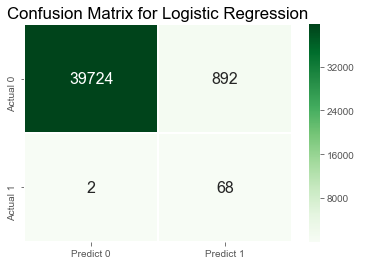

Iteration 1 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 70 to 140
Getting TRAIN DF for response 1 from index 0 to 70 and from index 140 to 492
Getting TEST DF for response 0 from index 40616 to 81232
Getting TRAIN DF for response 0 from index 0 to 40616 and from index 81232 to 284315
Oversampling is complete!
[[39688   928]
 [    7    63]]


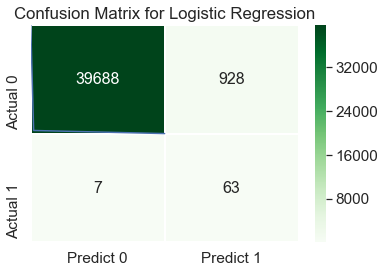

Iteration 2 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 140 to 210
Getting TRAIN DF for response 1 from index 0 to 140 and from index 210 to 492
Getting TEST DF for response 0 from index 81232 to 121848
Getting TRAIN DF for response 0 from index 0 to 81232 and from index 121848 to 284315
Oversampling is complete!
[[39779   837]
 [   10    60]]


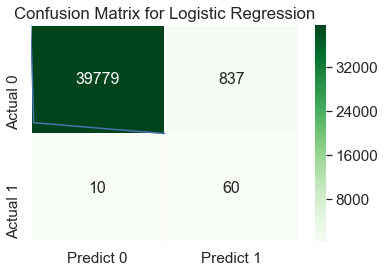

Iteration 3 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 210 to 280
Getting TRAIN DF for response 1 from index 0 to 210 and from index 280 to 492
Getting TEST DF for response 0 from index 121848 to 162464
Getting TRAIN DF for response 0 from index 0 to 121848 and from index 162464 to 284315
Oversampling is complete!
[[39727   889]
 [    5    65]]


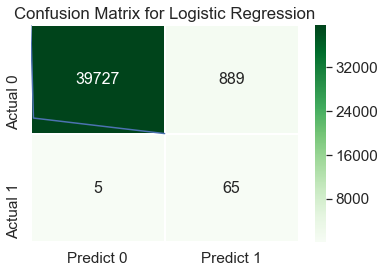

Iteration 4 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 280 to 350
Getting TRAIN DF for response 1 from index 0 to 280 and from index 350 to 492
Getting TEST DF for response 0 from index 162464 to 203080
Getting TRAIN DF for response 0 from index 0 to 162464 and from index 203080 to 284315
Oversampling is complete!
[[39740   876]
 [    8    62]]


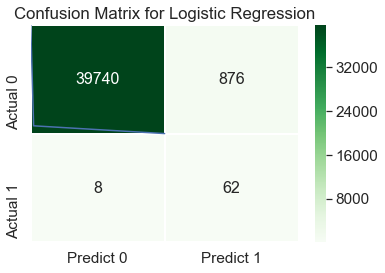

Iteration 5 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 350 to 420
Getting TRAIN DF for response 1 from index 0 to 350 and from index 420 to 492
Getting TEST DF for response 0 from index 203080 to 243696
Getting TRAIN DF for response 0 from index 0 to 203080 and from index 243696 to 284315
Oversampling is complete!
[[39666   950]
 [    3    67]]


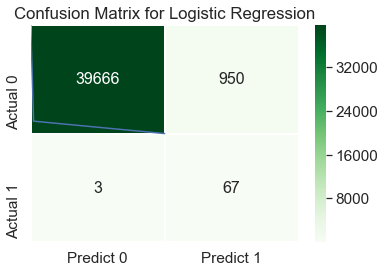

Iteration 6 out of 7 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 420 to 492
Getting TRAIN DF for response 1 from index 0 to 420
Getting TEST DF for response 0 from index 243696 to 284315
Getting TRAIN DF for response 0 from index 0 to 243696
Oversampling is complete!
[[39669   950]
 [   10    62]]


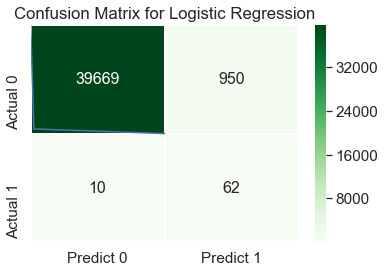

Iteration 7 out of 7 of CV for model fitting and obtaining results is complete!


Final Results of 7 fold CV:
{'accuracy': 0.9776445318579327, 'sensitivity': 0.9087301587301587, 'specificity': 0.9777641118356203, 'precision': 0.06609603274020268, 'f1': 0.12321786802174581, 'auc': 0.9432471352828895, 'actual_accuracy': 0.9997096399535425}


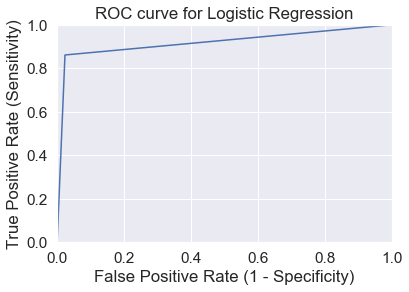

In [31]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'LogisticRegression', 'Logistic Regression', 7)

In [32]:
results['final']

{'accuracy': 0.9776445318579327,
 'sensitivity': 0.9087301587301587,
 'specificity': 0.9777641118356203,
 'precision': 0.06609603274020268,
 'f1': 0.12321786802174581,
 'auc': 0.9432471352828895,
 'actual_accuracy': 0.9997096399535425}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55622  1241]
 [    6    92]]


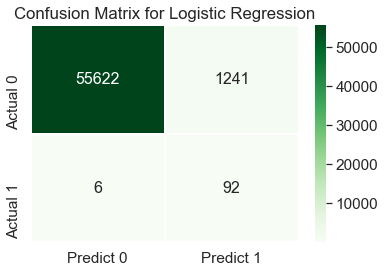

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55556  1307]
 [   10    88]]


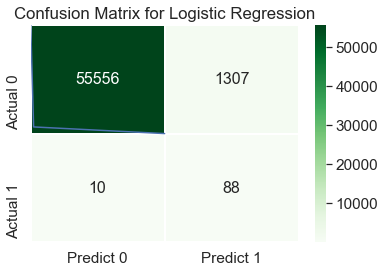

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55697  1166]
 [   10    88]]


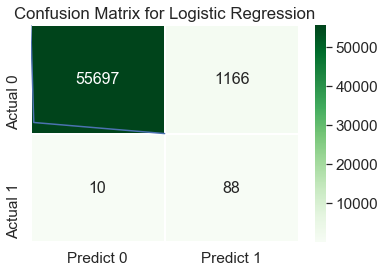

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55609  1254]
 [    9    89]]


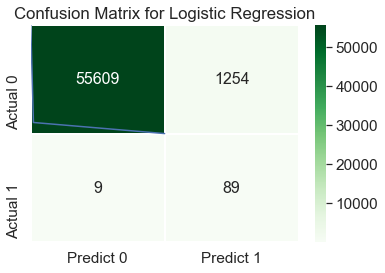

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55536  1327]
 [   13    87]]


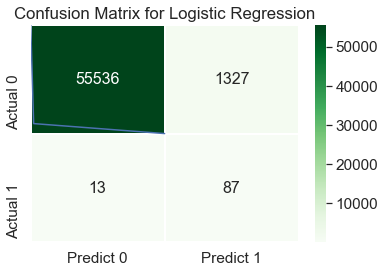

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9777287865314298, 'sensitivity': 0.9025714285714285, 'specificity': 0.9778590647697097, 'precision': 0.06601445146172352, 'f1': 0.12301901138720266, 'auc': 0.9402152466705692, 'actual_accuracy': 1.0}


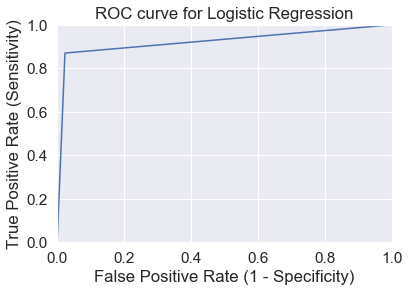

In [33]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'LogisticRegression', 'Logistic Regression', 5)

In [34]:
results['final']

{'accuracy': 0.9777287865314298,
 'sensitivity': 0.9025714285714285,
 'specificity': 0.9778590647697097,
 'precision': 0.06601445146172352,
 'f1': 0.12301901138720266,
 'auc': 0.9402152466705692,
 'actual_accuracy': 1.0}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55563  1300]
 [    6    92]]


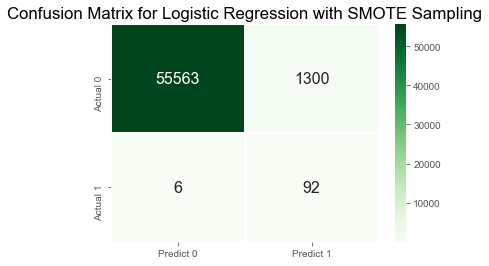

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55381  1482]
 [    9    89]]


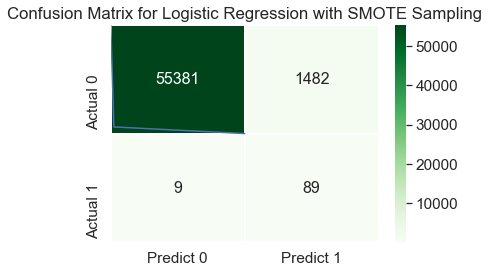

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55673  1190]
 [   10    88]]


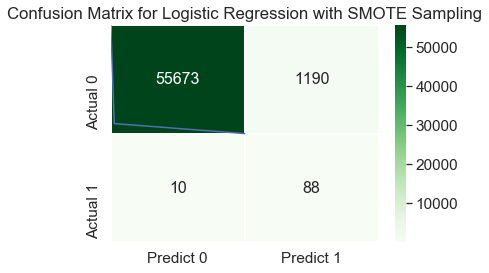

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55523  1340]
 [    8    90]]


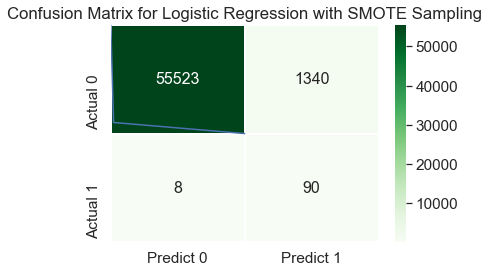

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55455  1408]
 [   12    88]]


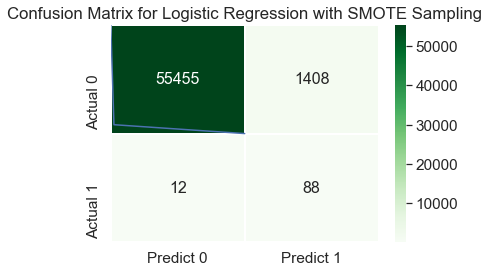

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9762470808339904, 'sensitivity': 0.9086530612244899, 'specificity': 0.976364243884424, 'precision': 0.06267239009745869, 'f1': 0.1172248670017838, 'auc': 0.9425086525544568, 'actual_accuracy': 1.0}


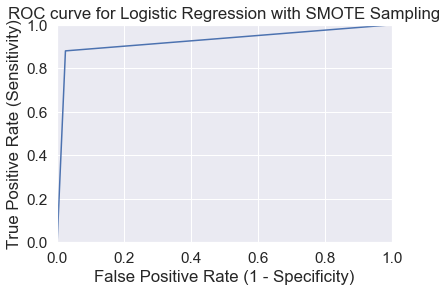

In [10]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'LogisticRegression', 'Logistic Regression with SMOTE Sampling', 5)

In [11]:
results['final']

{'accuracy': 0.9762470808339904,
 'sensitivity': 0.9086530612244899,
 'specificity': 0.976364243884424,
 'precision': 0.06267239009745869,
 'f1': 0.1172248670017838,
 'auc': 0.9425086525544568,
 'actual_accuracy': 1.0}

In [12]:
print(varlist)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[56759   104]
 [   14    84]]


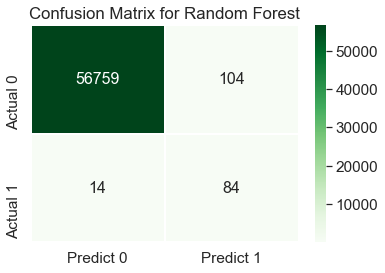

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[56755   108]
 [   10    88]]


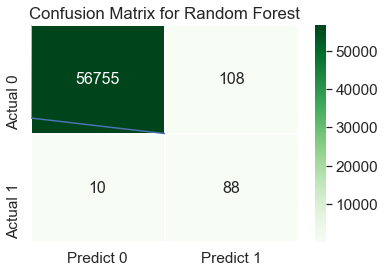

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[56764    99]
 [   16    82]]


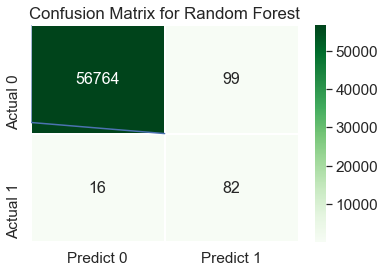

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[56789    74]
 [   15    83]]


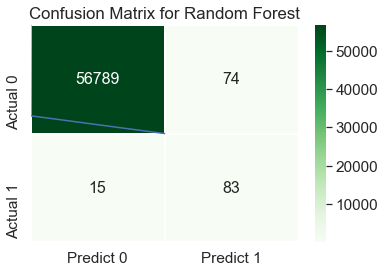

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[56727   136]
 [   14    86]]


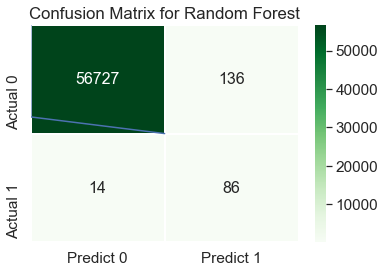

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9979284256476415, 'sensitivity': 0.8597551020408163, 'specificity': 0.9981675254559205, 'precision': 0.45297531685554693, 'f1': 0.5918015092213355, 'auc': 0.9289613137483684, 'actual_accuracy': 0.9227642276422765}


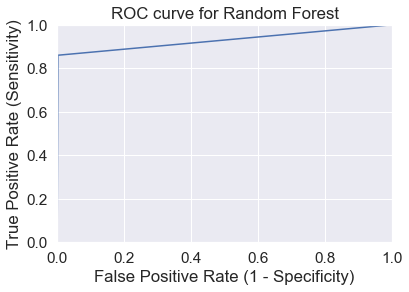

In [15]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'naive', 'RandomForest', 'Random Forest', 5)

In [16]:
results['final']

{'accuracy': 0.9979284256476415,
 'sensitivity': 0.8597551020408163,
 'specificity': 0.9981675254559205,
 'precision': 0.45297531685554693,
 'f1': 0.5918015092213355,
 'auc': 0.9289613137483684,
 'actual_accuracy': 0.9227642276422765}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56647   216]
 [   12    86]]


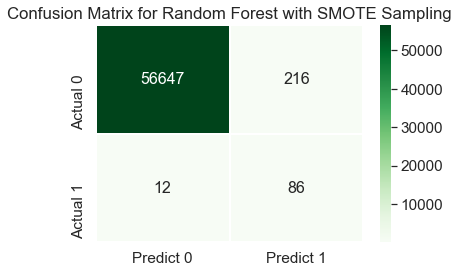

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56601   262]
 [   10    88]]


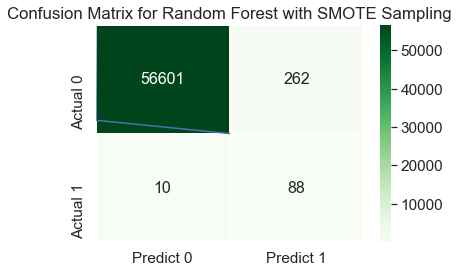

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56659   204]
 [   15    83]]


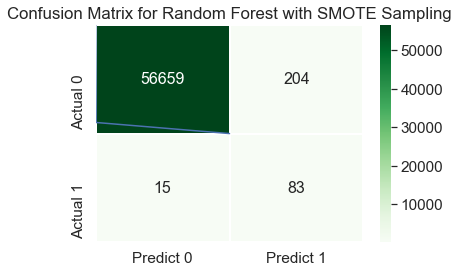

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56714   149]
 [   11    87]]


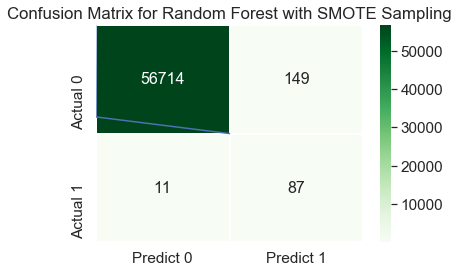

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[56629   234]
 [   13    87]]


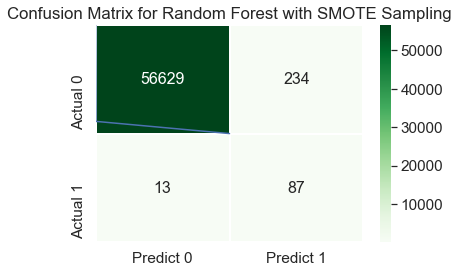

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9960464481743511, 'sensitivity': 0.8760408163265307, 'specificity': 0.9962541547227547, 'precision': 0.2930134989601332, 'f1': 0.43765714411322953, 'auc': 0.9361474855246428, 'actual_accuracy': 0.9040650406504064}


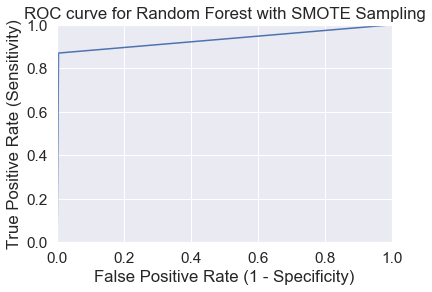

In [17]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', False, 'smote', 'RandomForest', 'Random Forest with SMOTE Sampling', 5)

In [18]:
results['final']

{'accuracy': 0.9960464481743511,
 'sensitivity': 0.8760408163265307,
 'specificity': 0.9962541547227547,
 'precision': 0.2930134989601332,
 'f1': 0.43765714411322953,
 'auc': 0.9361474855246428,
 'actual_accuracy': 0.9040650406504064}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.023955	validation_1-error:0.021383
[5]	validation_0-error:0.012334	validation_1-error:0.007725
[10]	validation_0-error:0.008184	validation_1-error:0.004494
[15]	validation_0-error:0.006454	validation_1-error:0.003336
[20]	validation_0-error:0.001068	validation_1-error:0.002826
[25]	validation_0-error:0.000835	validation_1-error:0.002142
[30]	validation_0-error:0.00067	validation_1-error:0.001826
[35]	validation_0-error:0.000646	validation_1-error:0.001668
[40]	validation_0-error:0.000561	validation_1-error:0.001545
[45]	validation_0-error:0.000477	validation_1-error:0.001404
[50]	validation_0-error:0.000422	validation_1-error:0.001282
[55]	validation_0-error:0.000352	validation_1-e

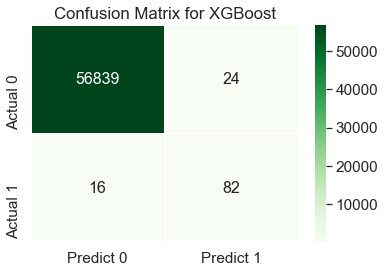

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.030855	validation_1-error:0.016345
[5]	validation_0-error:0.025276	validation_1-error:0.007426
[10]	validation_0-error:0.00858	validation_1-error:0.004793
[15]	validation_0-error:0.004445	validation_1-error:0.003933
[20]	validation_0-error:0.001633	validation_1-error:0.003371
[25]	validation_0-error:0.001499	validation_1-error:0.00309
[30]	validation_0-error:0.001238	validation_1-error:0.002668
[35]	validation_0-error:0.001172	validation_1-error:0.002546
[40]	validation_0-error:0.001071	validation_1-error:0.00251
[45]	validation_0-error:0.000866	validation_1-error:0.002124
[50]	validatio

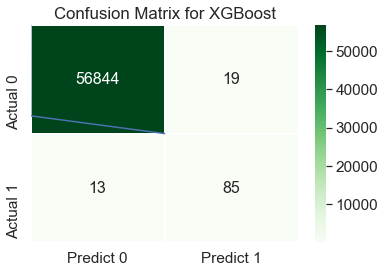

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.022965	validation_1-error:0.027545
[5]	validation_0-error:0.009769	validation_1-error:0.006952
[10]	validation_0-error:0.005412	validation_1-error:0.006004
[15]	validation_0-error:0.003834	validation_1-error:0.005232
[20]	validation_0-error:0.002091	validation_1-error:0.004442
[25]	validation_0-error:0.001679	validation_1-error:0.00381
[30]	validation_0-error:0.001376	validation_1-error:0.003371
[35]	validation_0-error:0.001097	validation_1-error:0.002826
[40]	validation_0-error:0.000947	validation_1-error:0.002352
[45]	validation_0-error:0.000789	validation_1-error:0.002019
[50]	val

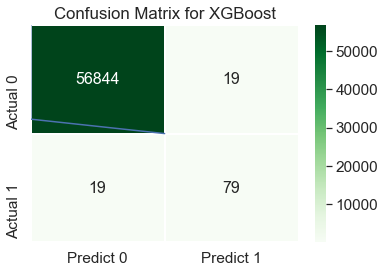

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.029776	validation_1-error:0.00718
[5]	validation_0-error:0.013807	validation_1-error:0.003336
[10]	validation_0-error:0.006727	validation_1-error:0.004055
[15]	validation_0-error:0.002796	validation_1-error:0.003827
[20]	validation_0-error:0.001321	validation_1-error:0.003494
[25]	validation_0-error:0.001121	validation_1-error:0.00323
[30]	validation_0-error:0.000868	validation_1-error:0.002686
[35]	validation_0-error:0.000723	validation_1-error:0.002212
[40]	validation_0-error:0.000605	validation_1-error:0.002054
[45]	validation_0-error:0.000554	validation_1-error:0.001984
[50]	vali

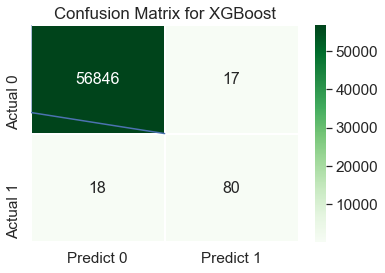

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.023908	validation_1-error:0.010621
[5]	validation_0-error:0.018558	validation_1-error:0.007795
[10]	validation_0-error:0.009719	validation_1-error:0.005425
[15]	validation_0-error:0.0029	validation_1-error:0.004108
[20]	validation_0-error:0.001372	validation_1-error:0.003599
[25]	validation_0-error:0.001038	validation_1-error:0.002774
[30]	validation_0-error:0.000785	validation_1-error:0.002405
[35]	validation_0-error:0.000666	validation_1-error:0.002036
[40]	validation_0-error:0.000554	validation_1-error:0.001966
[45]	validation_0-error:0.000525	validation_1-error:0.001826
[50]	validation_0-error:0.000486	validation_1-error:0.001633
[55]	v

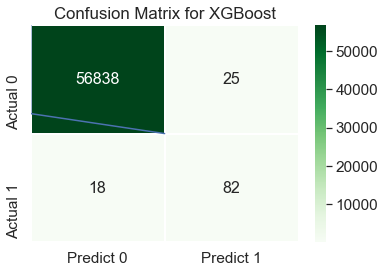

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9993399045302995, 'sensitivity': 0.8293061224489795, 'specificity': 0.9996342085363066, 'precision': 0.7976224910351628, 'f1': 0.8128823055873342, 'auc': 0.914470165492643, 'actual_accuracy': 0.7963414634146343}


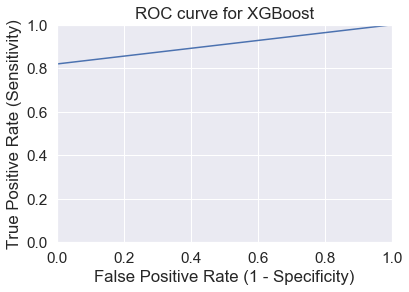

In [29]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoost', 'XGBoost', 5)

In [30]:
results

{'accuracy': [0.9992977651375503,
  0.9994382121100402,
  0.9993328768806727,
  0.9993855444953564,
  0.9992451240278778],
 'actual_accuracy': [0.8089430894308943,
  0.7987804878048781,
  0.7845528455284553,
  0.7967479674796748,
  0.7926829268292683],
 'sensitivity': [0.8367346938775511,
  0.8673469387755102,
  0.8061224489795918,
  0.8163265306122449,
  0.82],
 'specificity': [0.9995779329265075,
  0.9996658635668185,
  0.9996658635668185,
  0.9997010358229429,
  0.9995603467984454],
 'precision': [0.7735849056603774,
  0.8173076923076923,
  0.8061224489795918,
  0.8247422680412371,
  0.7663551401869159],
 'f1': [0.803921568627451,
  0.8415841584158416,
  0.806122448979592,
  0.8205128205128205,
  0.7922705314009661],
 'auc': [0.9181563134020293,
  0.9335064011711643,
  0.9028941562732052,
  0.908013783217594,
  0.9097801733992227],
 'final': {'accuracy': 0.9993399045302995,
  'sensitivity': 0.8293061224489795,
  'specificity': 0.9996342085363066,
  'precision': 0.7976224910351628,
 

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.035537	validation_1-error:0.019434
[5]	validation_0-error:0.026441	validation_1-error:0.010516
[10]	validation_0-error:0.019485	validation_1-error:0.009498
[15]	validation_0-error:0.016061	validation_1-error:0.007057
[20]	validation_0-error:0.010514	validation_1-error:0.006145
[25]	validation_0-error:0.007461	validation_1-error:0.005425
[30]	validation_0-error:0.004528	validation_1-error:0.004723
[35]	validation_0-error:0.004095	validation_1-error:0.004143
[40]	validation_0-error:0.003915	validation_1-error:0.003494
[45]	validation_0-error:0.002425	validation_1-error:0.002862
[50]	validation_0-error:0.001084	validation_1-error:0.002897
[55]	validation_0-error:0.000963	validation_1-

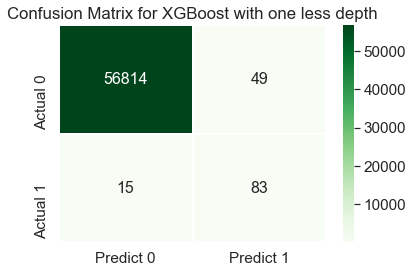

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.035867	validation_1-error:0.029195
[5]	validation_0-error:0.029987	validation_1-error:0.017064
[10]	validation_0-error:0.021376	validation_1-error:0.00776
[15]	validation_0-error:0.015318	validation_1-error:0.005706
[20]	validation_0-error:0.010266	validation_1-error:0.005618
[25]	validation_0-error:0.002379	validation_1-error:0.005021
[30]	validation_0-error:0.002088	validation_1-error:0.004547
[35]	validation_0-error:0.002016	validation_1-error:0.004301
[40]	validation_0-error:0.001787	validation_1-error:0.003792
[45]	validation_0-error:0.001611	validation_1-error:0.003318
[50]	validat

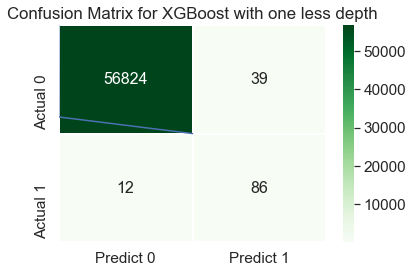

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.032972	validation_1-error:0.016783
[5]	validation_0-error:0.021134	validation_1-error:0.009006
[10]	validation_0-error:0.013966	validation_1-error:0.01034
[15]	validation_0-error:0.013284	validation_1-error:0.008936
[20]	validation_0-error:0.00843	validation_1-error:0.006619
[25]	validation_0-error:0.006766	validation_1-error:0.005829
[30]	validation_0-error:0.005144	validation_1-error:0.00539
[35]	validation_0-error:0.003555	validation_1-error:0.004828
[40]	validation_0-error:0.003282	validation_1-error:0.004249
[45]	validation_0-error:0.001838	validation_1-error:0.00395
[50]	valida

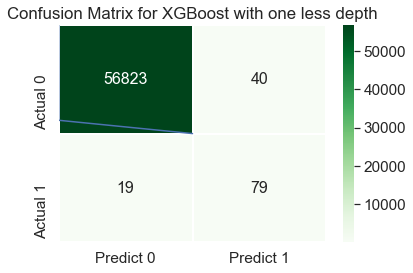

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.036091	validation_1-error:0.010095
[5]	validation_0-error:0.02541	validation_1-error:0.006303
[10]	validation_0-error:0.019367	validation_1-error:0.006864
[15]	validation_0-error:0.015997	validation_1-error:0.00546
[20]	validation_0-error:0.012036	validation_1-error:0.004881
[25]	validation_0-error:0.010523	validation_1-error:0.004512
[30]	validation_0-error:0.00652	validation_1-error:0.004161
[35]	validation_0-error:0.005087	validation_1-error:0.003704
[40]	validation_0-error:0.003803	validation_1-error:0.003564
[45]	validation_0-error:0.002381	validation_1-error:0.003283
[50]	valid

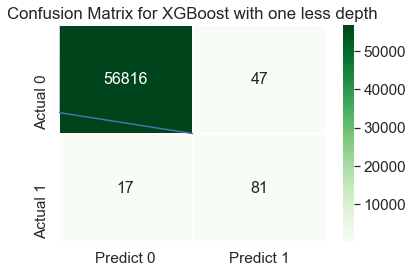

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.030941	validation_1-error:0.018275
[5]	validation_0-error:0.025284	validation_1-error:0.011727
[10]	validation_0-error:0.021712	validation_1-error:0.009304
[15]	validation_0-error:0.015616	validation_1-error:0.00718
[20]	validation_0-error:0.010048	validation_1-error:0.006039
[25]	validation_0-error:0.005966	validation_1-error:0.005196
[30]	validation_0-error:0.0045	validation_1-error:0.004705
[35]	validation_0-error:0.003229	validation_1-error:0.004477
[40]	validation_0-error:0.003056	validation_1-error:0.00402
[45]	validation_0-error:0.001618	validation_1-error:0.003458
[50]	validation_0-error:0.001468	validation_1-error:0.003213
[55]	val

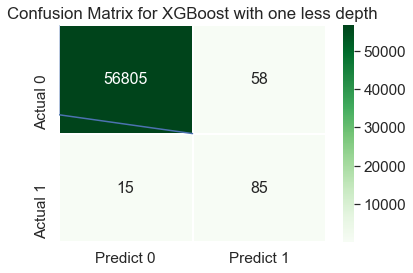

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9989080337882665, 'sensitivity': 0.8414285714285714, 'specificity': 0.9991804864323022, 'precision': 0.6415743038823921, 'f1': 0.7275105629203815, 'auc': 0.9203045289304368, 'actual_accuracy': 0.8004065040650407}


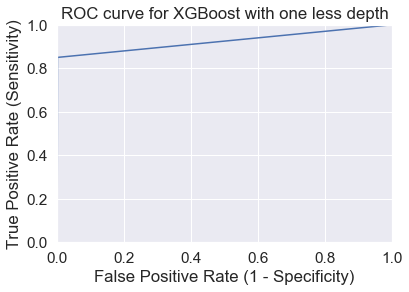

In [31]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoostminus1', 'XGBoost with one less depth', 5)

In [32]:
results['final']

{'accuracy': 0.9989080337882665,
 'sensitivity': 0.8414285714285714,
 'specificity': 0.9991804864323022,
 'precision': 0.6415743038823921,
 'f1': 0.7275105629203815,
 'auc': 0.9203045289304368,
 'actual_accuracy': 0.8004065040650407}

In [33]:
results

{'accuracy': [0.9988764242200804,
  0.9991046505503766,
  0.9989642035778866,
  0.9988764242200804,
  0.9987184663729087],
 'actual_accuracy': [0.8089430894308943,
  0.8028455284552846,
  0.7865853658536586,
  0.7987804878048781,
  0.8048780487804879],
 'sensitivity': [0.8469387755102041,
  0.8775510204081632,
  0.8061224489795918,
  0.826530612244898,
  0.85],
 'specificity': [0.999138279724953,
  0.9993141410055748,
  0.9992965548775126,
  0.9991734519810773,
  0.9989800045723933],
 'precision': [0.6287878787878788,
  0.688,
  0.6638655462184874,
  0.6328125,
  0.5944055944055944],
 'f1': [0.7217391304347825,
  0.7713004484304932,
  0.7281105990783411,
  0.7168141592920354,
  0.6995884773662552],
 'auc': [0.9230385276175785,
  0.938432580706869,
  0.9027095019285521,
  0.9128520321129876,
  0.9244900022861967],
 'final': {'accuracy': 0.9989080337882665,
  'sensitivity': 0.8414285714285714,
  'specificity': 0.9991804864323022,
  'precision': 0.6415743038823921,
  'f1': 0.7275105629203

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[0]	validation_0-error:0.018894	validation_1-error:0.011341
[5]	validation_0-error:0.009791	validation_1-error:0.005425
[10]	validation_0-error:0.00366	validation_1-error:0.002686
[15]	validation_0-error:0.001143	validation_1-error:0.002563
[20]	validation_0-error:0.000703	validation_1-error:0.001949
[25]	validation_0-error:0.000435	validation_1-error:0.00144
[30]	validation_0-error:0.000389	validation_1-error:0.001352
[35]	validation_0-error:0.000306	validation_1-error:0.001229
[40]	validation_0-error:0.00024	validation_1-error:0.001141
[45]	validation_0-error:0.000204	validation_1-error:0.000983
[50]	validation_0-error:0.000152	validation_1-error:0.000878
[55]	validation_0-error:0.000112	validation_1-err

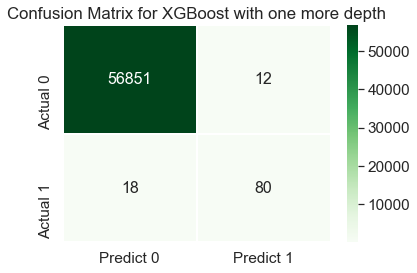

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[0]	validation_0-error:0.020259	validation_1-error:0.017837
[5]	validation_0-error:0.0088	validation_1-error:0.00481
[10]	validation_0-error:0.004434	validation_1-error:0.003599
[15]	validation_0-error:0.00118	validation_1-error:0.002493
[20]	validation_0-error:0.000769	validation_1-error:0.00158
[25]	validation_0-error:0.000618	validation_1-error:0.001229
[30]	validation_0-error:0.000528	validation_1-error:0.001124
[35]	validation_0-error:0.000466	validation_1-error:0.001018
[40]	validation_0-error:0.00042	validation_1-error:0.000966
[45]	validation_0-error:0.000345	validation_1-error:0.000825
[50]	validation_0

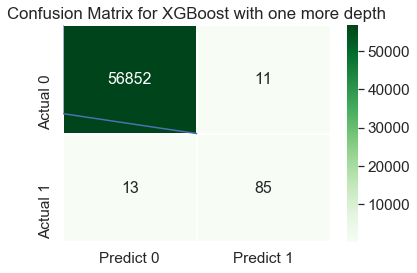

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[0]	validation_0-error:0.014462	validation_1-error:0.013816
[5]	validation_0-error:0.006931	validation_1-error:0.006654
[10]	validation_0-error:0.002807	validation_1-error:0.003459
[15]	validation_0-error:0.001027	validation_1-error:0.002616
[20]	validation_0-error:0.000976	validation_1-error:0.002352
[25]	validation_0-error:0.000807	validation_1-error:0.001984
[30]	validation_0-error:0.000681	validation_1-error:0.001773
[35]	validation_0-error:0.000508	validation_1-error:0.00144
[40]	validation_0-error:0.000442	validation_1-error:0.001299
[45]	validation_0-error:0.00038	validation_1-error:0.001194
[50]	vali

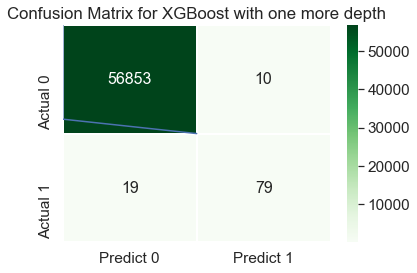

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[0]	validation_0-error:0.026781	validation_1-error:0.010411
[5]	validation_0-error:0.011053	validation_1-error:0.002967
[10]	validation_0-error:0.002044	validation_1-error:0.002616
[15]	validation_0-error:0.000952	validation_1-error:0.002879
[20]	validation_0-error:0.000701	validation_1-error:0.002317
[25]	validation_0-error:0.000554	validation_1-error:0.002054
[30]	validation_0-error:0.00047	validation_1-error:0.001633
[35]	validation_0-error:0.000457	validation_1-error:0.001527
[40]	validation_0-error:0.000382	validation_1-error:0.001404
[45]	validation_0-error:0.000314	validation_1-error:0.001229
[50]	val

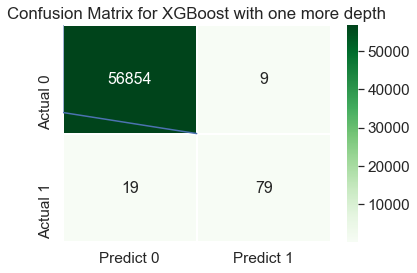

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[0]	validation_0-error:0.017481	validation_1-error:0.02865
[5]	validation_0-error:0.005634	validation_1-error:0.004652
[10]	validation_0-error:0.002302	validation_1-error:0.00302
[15]	validation_0-error:0.002146	validation_1-error:0.002493
[20]	validation_0-error:0.000673	validation_1-error:0.0023
[25]	validation_0-error:0.000541	validation_1-error:0.00172
[30]	validation_0-error:0.000404	validation_1-error:0.001492
[35]	validation_0-error:0.000325	validation_1-error:0.001246
[40]	validation_0-error:0.00024	validation_1-error:0.001106
[45]	validation_0-error:0.000189	validation_1-error:0.000983
[50]	validation_0-error:0.000176	validation_1-error:0.000966
[55]	valid

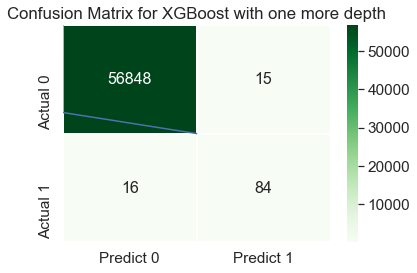

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9995014170693135, 'sensitivity': 0.8271836734693878, 'specificity': 0.9997995181400909, 'precision': 0.8777668909416588, 'f1': 0.8513994360334005, 'auc': 0.9134915958047394, 'actual_accuracy': 0.7873983739837399}


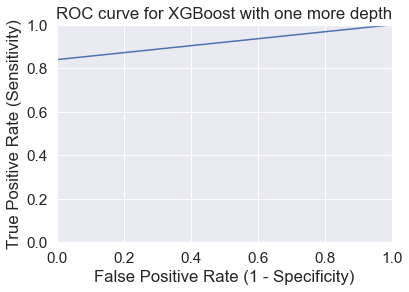

In [34]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'XGBoostplus1', 'XGBoost with one more depth', 5)

In [35]:
results['final']

{'accuracy': 0.9995014170693135,
 'sensitivity': 0.8271836734693878,
 'specificity': 0.9997995181400909,
 'precision': 0.8777668909416588,
 'f1': 0.8513994360334005,
 'auc': 0.9134915958047394,
 'actual_accuracy': 0.7873983739837399}

In [36]:
results

{'accuracy': [0.9994733238531627,
  0.9995786590825302,
  0.999490879724724,
  0.9995084355962852,
  0.9994557870898654],
 'actual_accuracy': [0.7987804878048781,
  0.7886178861788617,
  0.8048780487804879,
  0.7886178861788617,
  0.7560975609756098],
 'sensitivity': [0.8163265306122449,
  0.8673469387755102,
  0.8061224489795918,
  0.8061224489795918,
  0.84],
 'specificity': [0.9997889664632538,
  0.999806552591316,
  0.9998241387193781,
  0.9998417248474404,
  0.9997362080790673],
 'precision': [0.8695652173913043,
  0.8854166666666666,
  0.8876404494382022,
  0.8977272727272727,
  0.8484848484848485],
 'f1': [0.8421052631578948,
  0.8762886597938144,
  0.8449197860962567,
  0.849462365591398,
  0.8442211055276383],
 'auc': [0.9080577485377493,
  0.9335767456834131,
  0.902973293849485,
  0.9029820869135162,
  0.9198681040395337],
 'final': {'accuracy': 0.9995014170693135,
  'sensitivity': 0.8271836734693878,
  'specificity': 0.9997995181400909,
  'precision': 0.8777668909416588,
  

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.03907	validation_1-error:0.026931
[5]	validation_0-error:0.025702	validation_1-error:0.013571
[10]	validation_0-error:0.023976	validation_1-error:0.009586
[15]	validation_0-error:0.021565	validation_1-error:0.009164
[20]	validation_0-error:0.017881	validation_1-error:0.009147
[25]	validation_0-error:0.014904	validation_1-error:0.008146
[30]	validation_0-error:0.012414	validation_1-error:0.007883
[35]	validation_0-error:0.010512	validation_1-error:0.007461
[40]	validation_0-error:0.009204	validation_1-error:0.007128
[45]	validation_0-error:0.008136	validation_1-error:0.006566
[50]	validation_0-error:0.007327	validation_1-erro

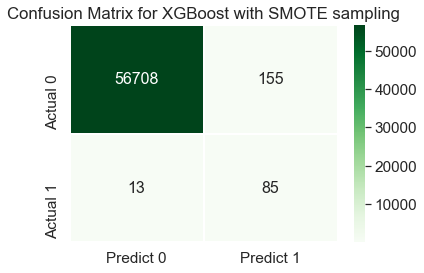

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.033965	validation_1-error:0.038008
[5]	validation_0-error:0.022719	validation_1-error:0.018047
[10]	validation_0-error:0.017375	validation_1-error:0.013641
[15]	validation_0-error:0.01426	validation_1-error:0.01027
[20]	validation_0-error:0.012345	validation_1-error:0.009919
[25]	validation_0-error:0.010633	validation_1-error:0.008953
[30]	validation_0-error:0.009378	validation_1-error:0.00869
[35]	validation_0-error:0.008134	validation_1-error:0.008041
[40]	validation_0-error:0.007215	validation_1-error:0.00776
[45]	validation_0-

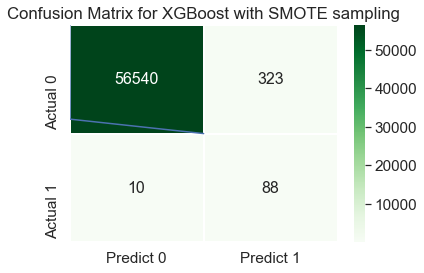

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.032537	validation_1-error:0.031039
[5]	validation_0-error:0.024238	validation_1-error:0.017767
[10]	validation_0-error:0.018441	validation_1-error:0.010376
[15]	validation_0-error:0.016318	validation_1-error:0.008971
[20]	validation_0-error:0.013992	validation_1-error:0.008971
[25]	validation_0-error:0.012181	validation_1-error:0.008901
[30]	validation_0-error:0.010007	validation_1-error:0.008374
[35]	validation_0-error:0.008822	validation_1-error:0.007953
[40]	validation_0-error:0.007454	validation_1-error:0.007057
[45]	valid

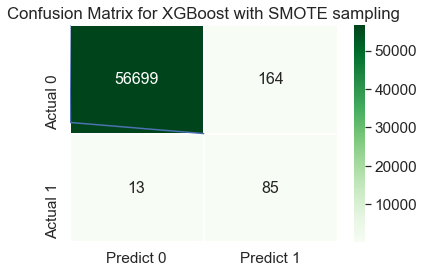

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.037192	validation_1-error:0.049385
[5]	validation_0-error:0.025425	validation_1-error:0.011429
[10]	validation_0-error:0.020866	validation_1-error:0.009076
[15]	validation_0-error:0.018195	validation_1-error:0.008567
[20]	validation_0-error:0.0159	validation_1-error:0.008234
[25]	validation_0-error:0.014876	validation_1-error:0.008128
[30]	validation_0-error:0.012972	validation_1-error:0.007988
[35]	validation_0-error:0.011642	validation_1-error:0.007286
[40]	validation_0-error:0.010407	validation_1-error:0.006864
[45]	validat

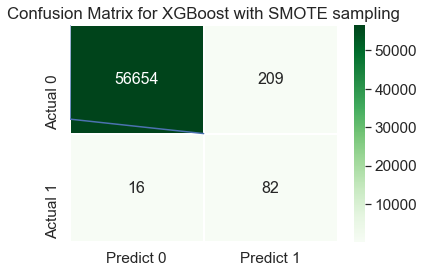

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[0]	validation_0-error:0.035983	validation_1-error:0.036111
[5]	validation_0-error:0.023732	validation_1-error:0.019258
[10]	validation_0-error:0.019024	validation_1-error:0.013202
[15]	validation_0-error:0.016546	validation_1-error:0.011604
[20]	validation_0-error:0.014757	validation_1-error:0.012008
[25]	validation_0-error:0.012829	validation_1-error:0.011376
[30]	validation_0-error:0.011444	validation_1-error:0.01099
[35]	validation_0-error:0.01007	validation_1-error:0.009971
[40]	validation_0-error:0.009103	validation_1-error:0.009533
[45]	validation_0-error:0.008107	validation_1-error:0.008672
[50]	vali

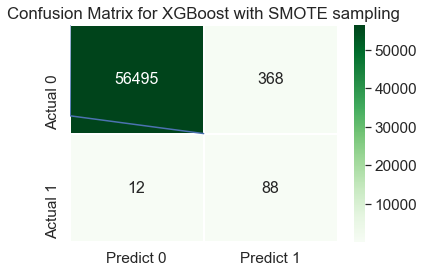

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9954952102034511, 'sensitivity': 0.8698775510204081, 'specificity': 0.9957125019784394, 'precision': 0.2768826896752565, 'f1': 0.4153577497817095, 'auc': 0.9327950264994238, 'actual_accuracy': 0.7406504065040651}


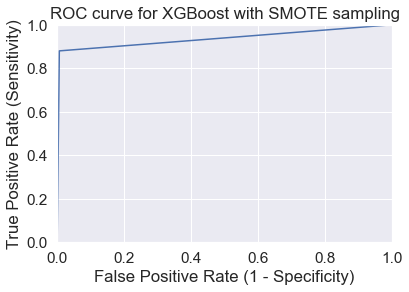

In [37]:
# self, df, varlist, response, standardize, sampletype, modelname, text, n_fold
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'XGBoost', 'XGBoost with SMOTE sampling', 5)

In [38]:
results['final']

{'accuracy': 0.9954952102034511,
 'sensitivity': 0.8698775510204081,
 'specificity': 0.9957125019784394,
 'precision': 0.2768826896752565,
 'f1': 0.4153577497817095,
 'auc': 0.9327950264994238,
 'actual_accuracy': 0.7406504065040651}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55820  1043]
 [    6    92]]


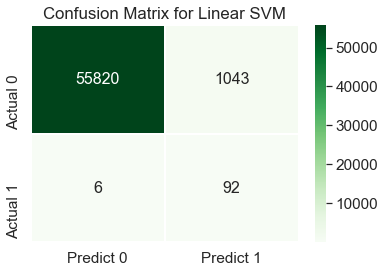

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55655  1208]
 [   10    88]]


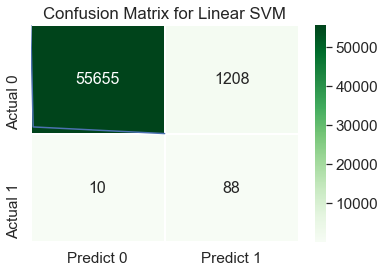

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55882   981]
 [   11    87]]


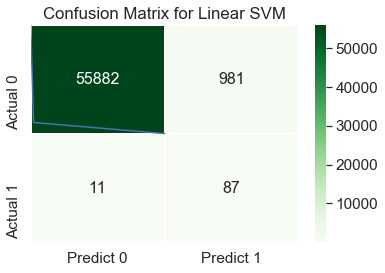

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55800  1063]
 [    9    89]]


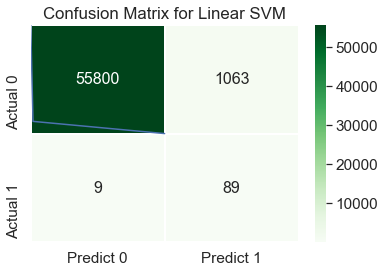

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55731  1132]
 [   13    87]]


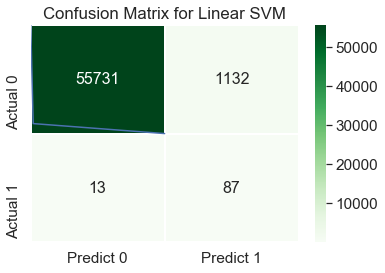

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9807729506207206, 'sensitivity': 0.9005306122448979, 'specificity': 0.9809120166013049, 'precision': 0.07580921945635594, 'f1': 0.139806230368216, 'auc': 0.9407213144231015, 'actual_accuracy': 1.0}


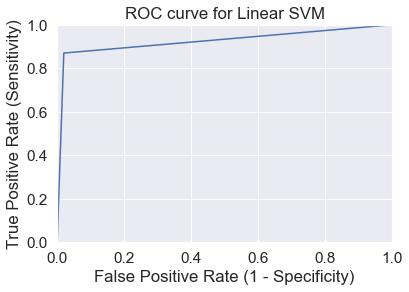

In [19]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear', 'Linear SVM', 5)

In [20]:
results['final']

{'accuracy': 0.9807729506207206,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.9809120166013049,
 'precision': 0.07580921945635594,
 'f1': 0.139806230368216,
 'auc': 0.9407213144231015,
 'actual_accuracy': 1.0}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55820  1043]
 [    6    92]]


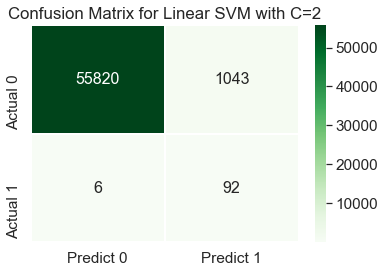

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[55650  1213]
 [   10    88]]


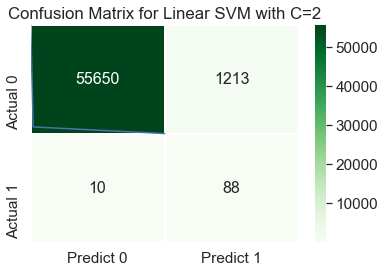

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55880   983]
 [   11    87]]


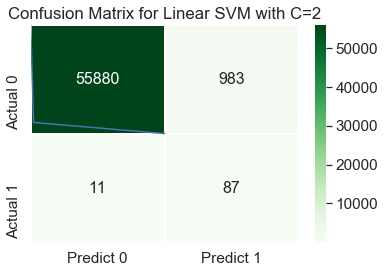

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55795  1068]
 [    9    89]]


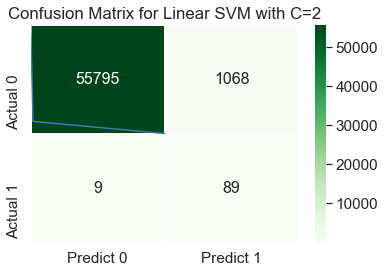

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55732  1131]
 [   13    87]]


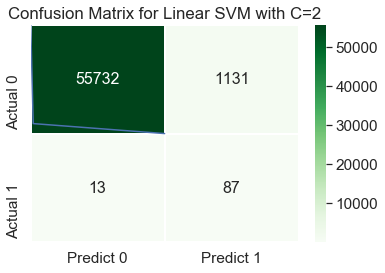

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9807343275800067, 'sensitivity': 0.9005306122448979, 'specificity': 0.9808733271195681, 'precision': 0.0756715209998583, 'f1': 0.1395714297562733, 'auc': 0.9407019696822332, 'actual_accuracy': 1.0}


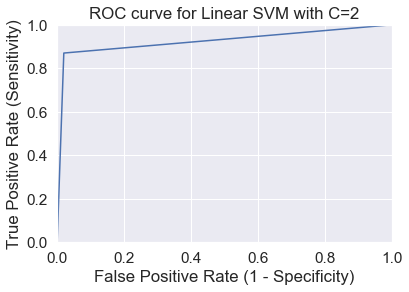

In [21]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear2', 'Linear SVM with C=2', 5)

In [22]:
results['final']

{'accuracy': 0.9807343275800067,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.9808733271195681,
 'precision': 0.0756715209998583,
 'f1': 0.1395714297562733,
 'auc': 0.9407019696822332,
 'actual_accuracy': 1.0}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Oversampling is complete!
[[55824  1039]
 [    6    92]]


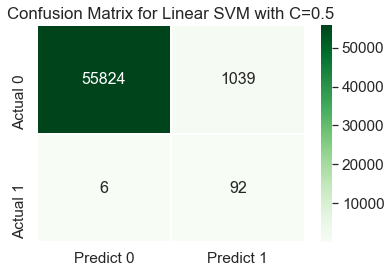

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Oversampling is complete!
[[55668  1195]
 [   10    88]]


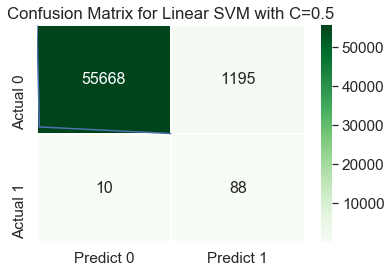

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Oversampling is complete!
[[55881   982]
 [   11    87]]


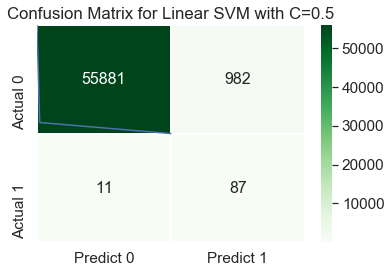

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Oversampling is complete!
[[55803  1060]
 [    9    89]]


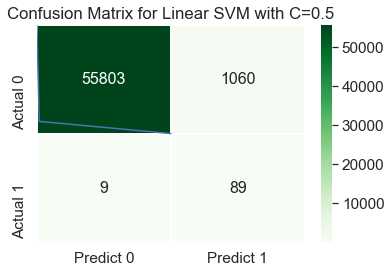

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Oversampling is complete!
[[55727  1136]
 [   13    87]]


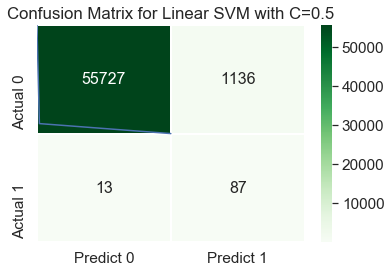

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9808256187285208, 'sensitivity': 0.9005306122448979, 'specificity': 0.9809647749854916, 'precision': 0.07598257360273035, 'f1': 0.1401042421022062, 'auc': 0.9407476936151946, 'actual_accuracy': 1.0}


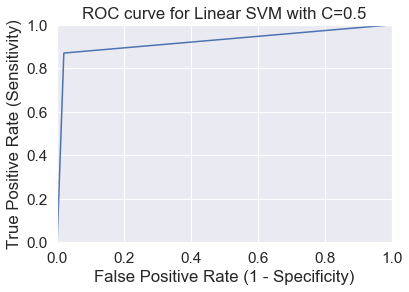

In [23]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'naive', 'SVM_Linear0.5', 'Linear SVM with C=0.5', 5)

In [24]:
results['final']

{'accuracy': 0.9808256187285208,
 'sensitivity': 0.9005306122448979,
 'specificity': 0.9809647749854916,
 'precision': 0.07598257360273035,
 'f1': 0.1401042421022062,
 'auc': 0.9407476936151946,
 'actual_accuracy': 1.0}

Getting TEST DF for response 1 from index 0 to 98
Getting TRAIN DF for response 1 from index 0 to 0 and from index 98 to 492
Getting TEST DF for response 0 from index 0 to 56863
Getting TRAIN DF for response 0 from index 0 to 0 and from index 56863 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55813  1050]
 [    7    91]]


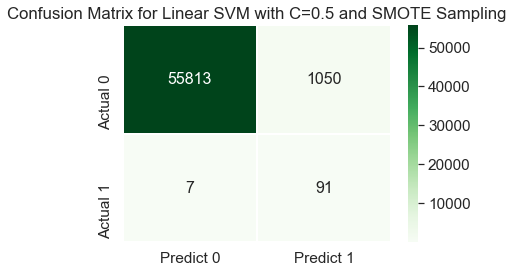

Iteration 1 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 98 to 196
Getting TRAIN DF for response 1 from index 0 to 98 and from index 196 to 492
Getting TEST DF for response 0 from index 56863 to 113726
Getting TRAIN DF for response 0 from index 0 to 56863 and from index 113726 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55500  1363]
 [   10    88]]


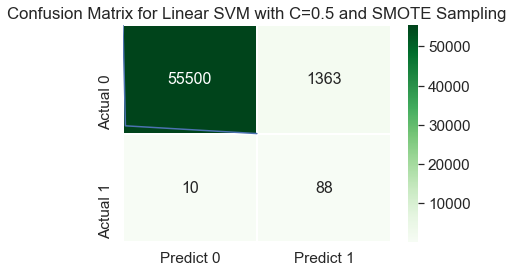

Iteration 2 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 196 to 294
Getting TRAIN DF for response 1 from index 0 to 196 and from index 294 to 492
Getting TEST DF for response 0 from index 113726 to 170589
Getting TRAIN DF for response 0 from index 0 to 113726 and from index 170589 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55806  1057]
 [   11    87]]


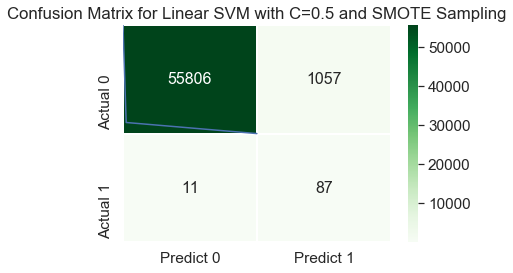

Iteration 3 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 294 to 392
Getting TRAIN DF for response 1 from index 0 to 294 and from index 392 to 492
Getting TEST DF for response 0 from index 170589 to 227452
Getting TRAIN DF for response 0 from index 0 to 170589 and from index 227452 to 284315
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55723  1140]
 [    9    89]]


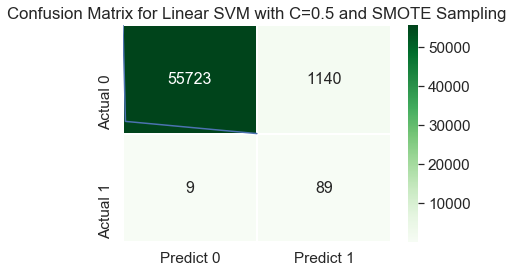

Iteration 4 out of 5 of CV for model fitting and obtaining results is complete!


Getting TEST DF for response 1 from index 392 to 492
Getting TRAIN DF for response 1 from index 0 to 392
Getting TEST DF for response 0 from index 227452 to 284315
Getting TRAIN DF for response 0 from index 0 to 227452
Number of Xs and Ys for SMOTE:
[(0, 227452), (1, 227452)]
Oversampling is complete!
[[55647  1216]
 [   13    87]]


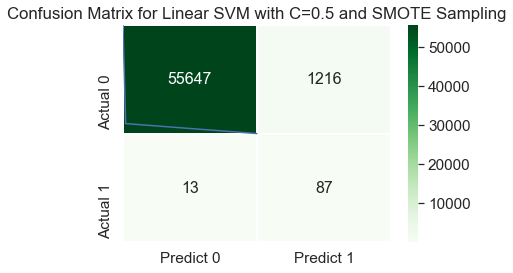

Iteration 5 out of 5 of CV for model fitting and obtaining results is complete!


Final Results of 5 fold CV:
{'accuracy': 0.9793684912512672, 'sensitivity': 0.8984897959183673, 'specificity': 0.9795086435819427, 'precision': 0.07112739496959604, 'f1': 0.1317536147685025, 'auc': 0.9389992197501549, 'actual_accuracy': 1.0}


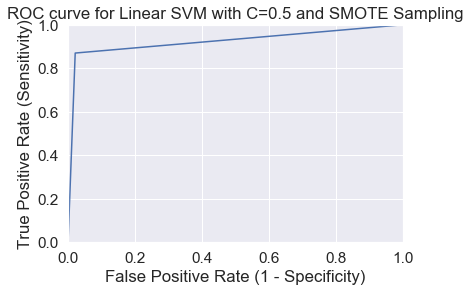

In [25]:
# run_model(self, df, varlist, response, standardize, sampletype, modelname, text, n_fold)
results = modelpipeline.run_model(df, varlist, 'Class', True, 'smote', 'SVM_Linear0.5', 'Linear SVM with C=0.5 and SMOTE Sampling', 5)

In [26]:
results['final']

{'accuracy': 0.9793684912512672,
 'sensitivity': 0.8984897959183673,
 'specificity': 0.9795086435819427,
 'precision': 0.07112739496959604,
 'f1': 0.1317536147685025,
 'auc': 0.9389992197501549,
 'actual_accuracy': 1.0}